# TAHAP 1. PREPROCESSING

`import library dan inisialisasi nama file yang akan dibuat`

In [1]:
#import library
import pandas as pd
import numpy as np

file_komentar = "data_terakhir.csv"
file_normalisasi = "new_normalisasi.xlsx"
file_output_preprocessing = "pra_komentar.csv"


parameter_sentimen = "Sentimen"
parameter_komentar = "Komentar"

#membuka file komentar
komentar = pd.read_csv(file_komentar, error_bad_lines=False, encoding="utf-8")
komentar.columns =['Nama', 'Komentar', 'Sentimen','Time']

komentar['hasil_sentimen'] = komentar[parameter_sentimen]
komentar['hasil_komentar'] = komentar[parameter_komentar]
komentar.head(10)

,Nama,Komentar,Sentimen,Time,hasil_sentimen,hasil_komentar
0,Dannay Bim,"Zona merah zona Oren,kuning ijo resikonya sama...",netral,2020-11-07T22:41:20Z,netral,"Zona merah zona Oren,kuning ijo resikonya sama..."
1,Bambang Wibi,"Zaman ku dulu masih enak, ada Televisi Pendidi...",negatif,2020-10-13T02:34:15Z,negatif,"Zaman ku dulu masih enak, ada Televisi Pendidi..."
2,Indra Sugi,Yukssss....belajar dl dr mendiknas jaman dl pi...,negatif,2020-09-28T05:54:36Z,negatif,Yukssss....belajar dl dr mendiknas jaman dl pi...
3,Arum Catur,Yth. Pak mentri tolong beri kebijakan agar sel...,netral,2020-09-24T03:30:55Z,netral,Yth. Pak mentri tolong beri kebijakan agar sel...
4,Feliks Dasman,Yth. Pak Menteri. \nDalam pelaksanaan pembelaj...,netral,2020-09-01T13:00:45Z,netral,Yth. Pak Menteri. \nDalam pelaksanaan pembelaj...
5,Li Susanto,Yth Bpk. Menteri. Sampai saat ini sekolah (swa...,netral,2020-07-27T13:29:58Z,netral,Yth Bpk. Menteri. Sampai saat ini sekolah (swa...
6,Totanium TV,"You sir, already get my respect.. Mas Menteri ...",positif,2020-07-14T06:30:12Z,positif,"You sir, already get my respect.. Mas Menteri ..."
7,Jaya Pradha,You should be the next President. Indonesia ne...,positif,2020-07-13T17:00:32Z,positif,You should be the next President. Indonesia ne...
8,#Analisa K,Yg terbaik???\n \nBung anda ini jangan hanya m...,negatif,2020-11-02T03:24:03Z,negatif,Yg terbaik???\n \nBung anda ini jangan hanya m...
9,Dhika Dhikaa,Yg terbaik dan menguntungkan ??,negatif,2020-07-11T18:48:27Z,negatif,Yg terbaik dan menguntungkan ??


In [2]:
import string 
import re #regex library
import nltk
nltk.download('punkt')

from nltk import word_tokenize,sent_tokenize

# import word_tokenize dan FreqDist dari NLTK
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
# ------ Case Folding --------
def casefolding(text):
    text = text.lower()
    return text

In [4]:
#--------- PROSES TOKENIZING --------- 

def remove_special_char(text):
    #remove incomplete URL
    text = re.sub(r"http\S+", "", text)
    # change emoticon into their represented word
    #text = text.replace (':-)',"Emot-senyum").replace (':)',"Emot-senyum").text.replace ('(:',"Emot-senyum") .text.replace ('(-:',"Emot-senyum").text.replace ('^^', "Emot-senyum").text.replace ('^-^', "Emot-senyum").text.replace ('^_^',"Emot-senyum")
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove non ASCII (simbols, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove incomplete URL
    text = text.replace("http://", " ").replace("https://", " ")
    return text

#remove number
def remove_number(text):
    return  re.sub(r"\d+", "", text)

#remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

# NLTK word rokenize 
def word_tokenize_wrapper(text):
    return word_tokenize(text)

# final function
# fungsi untuk resume semua fungsi tokenizing

def tokenizing(text):
    text = remove_special_char(text)
    text = remove_number(text)
    text = remove_punctuation(text)
    text = remove_whitespace_LT(text)
    text = remove_whitespace_multiple(text)
    text = remove_singl_char(text)
    text = word_tokenize_wrapper(text)
    return text


In [5]:
#fungsi gabungan tokenizing dan casefolding
def tokenizing_casefolding(text):
    text = casefolding(str(text))
    text = tokenizing(text)
    return text

In [6]:
komentar['tokenizing'] = komentar['hasil_komentar'].apply(tokenizing_casefolding)
komentar['tokenizing'].head(20)

0     [zona, merah, zona, orenkuning, ijo, resikonya...
1     [zaman, ku, dulu, masih, enak, ada, televisi, ...
2     [yukssssbelajar, dl, dr, mendiknas, jaman, dl,...
3     [yth, pak, mentri, tolong, beri, kebijakan, ag...
4     [yth, pak, menteri, dalam, pelaksanaan, pembel...
5     [yth, bpk, menteri, sampai, saat, ini, sekolah...
6     [you, sir, already, get, my, respect, mas, men...
7     [you, should, be, the, next, president, indone...
8     [yg, terbaik, bung, anda, ini, jangan, hanya, ...
9                     [yg, terbaik, dan, menguntungkan]
10    [yg, paling, sebel, sama, emak, emak, yg, sok,...
11    [yg, lebih, parah, lagi, adanya, krisis, keper...
12    [yg, kurang, dr, pendidikan, di, indonesia, ya...
13    [yg, kayak, begini, hrs, didukung, dng, sepenu...
14    [yg, kasihan, yg, tinggl, di, pelosok, pak, gk...
15    [yg, dulu, negatif, terhadap, nadim, otaknya, ...
16    [yg, dipikirkan, pendidikan, sajatapi, anda, b...
17           [yg, bilang, alesan, fix, otaknya, 

In [7]:
komentar.head(10)

,Nama,Komentar,Sentimen,Time,hasil_sentimen,hasil_komentar,tokenizing
0,Dannay Bim,"Zona merah zona Oren,kuning ijo resikonya sama...",netral,2020-11-07T22:41:20Z,netral,"Zona merah zona Oren,kuning ijo resikonya sama...","[zona, merah, zona, orenkuning, ijo, resikonya..."
1,Bambang Wibi,"Zaman ku dulu masih enak, ada Televisi Pendidi...",negatif,2020-10-13T02:34:15Z,negatif,"Zaman ku dulu masih enak, ada Televisi Pendidi...","[zaman, ku, dulu, masih, enak, ada, televisi, ..."
2,Indra Sugi,Yukssss....belajar dl dr mendiknas jaman dl pi...,negatif,2020-09-28T05:54:36Z,negatif,Yukssss....belajar dl dr mendiknas jaman dl pi...,"[yukssssbelajar, dl, dr, mendiknas, jaman, dl,..."
3,Arum Catur,Yth. Pak mentri tolong beri kebijakan agar sel...,netral,2020-09-24T03:30:55Z,netral,Yth. Pak mentri tolong beri kebijakan agar sel...,"[yth, pak, mentri, tolong, beri, kebijakan, ag..."
4,Feliks Dasman,Yth. Pak Menteri. \nDalam pelaksanaan pembelaj...,netral,2020-09-01T13:00:45Z,netral,Yth. Pak Menteri. \nDalam pelaksanaan pembelaj...,"[yth, pak, menteri, dalam, pelaksanaan, pembel..."
5,Li Susanto,Yth Bpk. Menteri. Sampai saat ini sekolah (swa...,netral,2020-07-27T13:29:58Z,netral,Yth Bpk. Menteri. Sampai saat ini sekolah (swa...,"[yth, bpk, menteri, sampai, saat, ini, sekolah..."
6,Totanium TV,"You sir, already get my respect.. Mas Menteri ...",positif,2020-07-14T06:30:12Z,positif,"You sir, already get my respect.. Mas Menteri ...","[you, sir, already, get, my, respect, mas, men..."
7,Jaya Pradha,You should be the next President. Indonesia ne...,positif,2020-07-13T17:00:32Z,positif,You should be the next President. Indonesia ne...,"[you, should, be, the, next, president, indone..."
8,#Analisa K,Yg terbaik???\n \nBung anda ini jangan hanya m...,negatif,2020-11-02T03:24:03Z,negatif,Yg terbaik???\n \nBung anda ini jangan hanya m...,"[yg, terbaik, bung, anda, ini, jangan, hanya, ..."
9,Dhika Dhikaa,Yg terbaik dan menguntungkan ??,negatif,2020-07-11T18:48:27Z,negatif,Yg terbaik dan menguntungkan ??,"[yg, terbaik, dan, menguntungkan]"


In [8]:
#normalisasi dan word handling
normalizad_word = pd.read_excel(file_normalisasi)

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

In [9]:
komentar['normalisasi'] = komentar['tokenizing'].apply(normalized_term)
komentar['normalisasi'].head(10)

0    [zona, merah, zona, orenkuning, ijo, resikonya...
1    [zaman, ku, dulu, masih, enak, ada, televisi, ...
2    [yukssssbelajar, dulu, dari, mendiknas, jaman,...
3    [yth, pak, menteri, tolong, beri, kebijakan, a...
4    [yth, pak, menteri, dalam, pelaksanaan, pembel...
5    [yth, bapak, menteri, sampai, saat, ini, sekol...
6    [you, sir, already, get, my, respect, mas, men...
7    [you, should, be, the, next, president, indone...
8    [yang, terbaik, bung, anda, ini, jangan, hanya...
9                  [yang, terbaik, dan, menguntungkan]
Name: normalisasi, dtype: object

In [10]:
#----------- STOP WORD -----------

from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
# get stopword indonesia
list_stopwords = stopwords.words('indonesian')

# append additional stopword
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah','yth'])

# ----------------------- add stopword from txt file ------------------------------------
# read txt stopword using pandas
txt_stopword = pd.read_csv("stopword.csv", names= ["stopwords"])

# convert stopword string to list & append additional stopword
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))

# convert list to dictionary
list_stopwords = set(list_stopwords)


#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
komentar['stopword'] = komentar['normalisasi'].apply(stopwords_removal)
komentar['stopword'].head(10)

0    [zona, merah, zona, orenkuning, ijo, resikonya...
1    [zaman, ku, enak, televisi, pendidikan, indone...
2    [yukssssbelajar, mendiknas, jaman, pintar, bij...
3    [menteri, tolong, kebijakan, sekolah, universi...
4    [menteri, pelaksanaan, pembelajaran, sekolah, ...
5    [menteri, sekolah, swasta, menyekolahkan, anak...
6    [you, sir, already, get, my, respect, mas, men...
7    [you, should, be, the, next, president, indone...
8    [terbaik, indonesia, jakarta, kota, indonesia,...
9                             [terbaik, menguntungkan]
Name: stopword, dtype: object

In [12]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}
for document in komentar['stopword']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
for term in term_dict:
    term_dict[term] = stemmed_wrapper(str(term))
    print(term,":" ,term_dict[term])

def get_stemmed_term(document):
    return [term_dict[term] for term in document]

zona : zona
merah : merah
orenkuning : orenkuning
ijo : ijo
resikonya : resiko
anak : anak
tumbal : tumbal
kovid : kovid
alangkah : alangkah
baiknya : baik
belajar : ajar
dirumah : rumah
vaksin : vaksin
ditemukan : temu
zaman : zaman
ku : ku
enak : enak
televisi : televisi
pendidikan : didik
indonesia : indonesia
tpi : tpi
yukssssbelajar : yukssssbelajar
mendiknas : mendiknas
jaman : jaman
pintar : pintar
bijak : bijak
fuad : fuad
hasan : hasan
saudara : saudara
kekurangan : kurang
jg : jg
kesusahan : susah
beli : beli
pulsa : pulsa
ut : ut
bjj : bjj
begimane : begimane
menteri : menteri
tolong : tolong
kebijakan : bijak
sekolah : sekolah
universitas : universitas
memotong : potong
biaya : biaya
terimakasih : terimakasih
pelaksanaan : laksana
pembelajaran : ajar
kali : kali
guru : guru
dihadapkan : hadap
masalh : masalh
teknis : teknis
daring : daring
aplikasi : aplikasi
berjalan : jalan
efektif : efektif
efisien : efisien
keterbatasan : batas
fasilitas : fasilitas
bgi : bgi
peserta : 

position : position
to : to
state : state
keep : keep
up : up
good : good
work : work
what : what
brainboosting : brainboosting
talk : talk
heran : heran
steve : steve
jobnya : jobnya
peduli : peduli
bantu : bantu
bisnisnya : bisnis
weh : weh
alami : alami
lonely : lonely
bertemu : temu
teman : teman
temannya : teman
bahagia : bahagia
gon : gon
na : na
it : it
together : together
know : know
somehow : somehow
go : go
believe : believe
spirit : spirit
sehat : sehat
kebanyakan : banyak
kabar : kabar
buruk : buruk
nampaknya : nampaknya
secercah : cercah
gw : gw
darah : darah
bersyukur : syukur
menjalankan : jalan
un : un
kebayang : bayang
dipaksakan : paksa
covid : covid
pusing : pusing
menggiring : giring
menjepit : jepit
kepertanyaan : tanya
profokatif : profokatif
tpmz : tpmz
tulus : tulus
catatan : catat
dedy : dedy
tuk : tuk
ketulusan : tulus
wajahnya : wajah
penuh : penuh
beban : beban
lihatnya : lihat
waah : waah
sabar : sabar
nunggu : nunggu
sd : sd
nyasemoga : nyasemoga
cepet : c

since : since
st : st
time : time
his : his
years : years
old : old
can : can
imagine : imagine
thanks : thanks
chosen : chosen
as : as
makan : makan
maksimal : maksimal
berkontribusi : kontribusi
ngotak : ngotak
mentrikasihan : mentrikasihan
anakharus : anakharus
desa : desa
kendala : kendala
mensiasatinya : siasat
berjarak : jarak
kebun : kebun
balai : balai
cerdaslah : cerdas
dikit : dikit
situasional : situasional
memperhatikan : perhati
sekalah : seka
pandemikrn : pandemikrn
discount : discount
uang : uang
gcr : gcr
papan : papan
bimbel : bimbel
merangkum : rangkum
feelnya : feelnya
dikelas : kelas
nasib : nasib
perhatikan : perhati
roling : roling
masker : masker
gedung : gedung
tutup : tutup
warkop : warkop
wifi : wifi
nunggui : nunggui
sekolahin : sekolahin
jaraksoalnya : jaraksoalnya
sya : sya
malas : malas
pakai : pakai
hpeh : hpeh
sibuk : sibuk
diganggu : ganggu
gugat : gugat
sorry : sorry
say : say
ngerjain : ngerjain
sempet : sempet
nguasai : nguasai
smu : smu
basicly : ba

support : support
bang : bang
super : super
tough : tough
assignment : assignment
but : but
impactful : impactful
futurr : futurr
suport : suport
full : full
superr : superr
superb : superb
mr : mr
mempermudah : mudah
dibuatkan : buat
diterbangkan : terbang
balon : balon
udara : udara
jepang : jepang
sungguh : sungguh
sumpah : sumpah
iniii : iniii
mengangkat : angkat
negatifnya : negatif
positifnya : positif
ngak : ngak
trending : trending
garagara : garagara
berita : berita
gt : gt
maksudnya : maksud
lumayan : lumayan
sepemikiran : pikir
pinteran : pinteran
wkwkwkwk : wkwkwkwk
bener : bener
wkwkwk : wkwkwk
mayoritas : mayoritas
disekitarku : sekitar
adh : adh
anatara : anatara
diberitakan : berita
kenyataan : nyata
dilapangan : lapang
diawal : awal
tv : tv
bergelimpangan : gelimpang
shg : shg
mencekam : cekam
smg : smg
pembuat : buat
hidayah : hidayah
bijaksana : bijaksana
memberkahi : kah
amin : amin
dilindungi : lindung
pemuda : pemuda
jenius : jenius
dibenci : benci
nadiembener : n

hopefully : hopefully
still : still
transformation : transformation
our : our
system : system
situationgod : situationgod
bless : bless
berdampak : dampak
keperkembangan : kembang
indonesiasaya : indonesiasaya
rileks : rileks
kak : kak
kapten : kapten
kapal : kapal
tercipta : cipta
terberat : berat
melindungi : lindung
niat : niat
baikpasti : baikpasti
mudahkan : mudah
kelancaran : lancar
mulia : mulia
reailasi : reailasi
keputusannya : putus
teruus : teruus
bicara : bicara
wawasan : wawas
sekolahku : sekolah
perbulan : bulan
dapet : dapet
sekolahan : sekolah
momok : momok
menakutkan : takut
terkena : kena
cafe : cafe
resto : resto
pikiran : pikir
aslu : aslu
tambahan : tambah
seminar : seminar
kemarin : kemarin
foto : foto
kartu : kartu
mahalkuliah : mahalkuliah
ongkos : ongkos
kampungakhirnya : kampungakhirnya
buruh : buruh
tani : tani
diribetin : diribetin
seketat : ketat
kesehatannya : sehat
hamil : hamil
pembelajarannya : ajar
pendidikannya : didik
jarang : jarang
materinya : mate

hafalhampir : hafalhampir
gambar : gambar
buah : buah
kendaraan : kendara
hewan : hewan
oarang : oarang
jelek : jelek
roboh : roboh
tersentuh : sentuh
terlantar : lantar
dianggap : anggap
terekspos : ekspos
kesadaran : sadar
programnya : program
hadir : hadir
sumatera : sumatera
senior : senior
kabupaten : kabupaten
agam : agam
ungkapan : ungkap
menit : menit
pgi : pgi
malam : malam
cuman : cuman
nauzubillah : nauzubillah
gasesuai : gasesuai
mna : mna
gadiajarin : gadiajarin
mke : mke
brainly : brainly
gamempan : gamempan
basic : basic
materiny : materiny
critical : critical
thinking : thinking
ngakak : ngakak
condong : condong
politisi : politis
pndidikan : pndidikan
engga : engga
poin : poin
pokok : pokok
bicarakan : bicara
dirugikan : rugi
berpedoman : pedoman
zoomgoogle : zoomgoogle
mewakili : wakil
siswai : siswa
terhalang : halang
seenggaknya : enggak
promo : promo
sekarat : sekarat
tolonglah : tolong
pertimbangan : timbang
dilanjutkan : lanjut
depresi : depresi
detail : detail
p

kartini : kartini
ampe : ampe
bergeriliya : bergeriliya
menghindari : hindar
berkah : berkah
daerahbopbancaan : daerahbopbancaan
bancaan : bancaan
bop : bop
junilaporan : junilaporan
belanja : belanja
januarijuly : januarijuly
dilaporkan : lapor
dinasdr : dinasdr
dpt : dpt
nota : nota
januarijuni : januarijuni
toko : toko
maulahjurus : maulahjurus
dewa : dewa
mabuk : mabuk
harganyahuuuumark : harganyahuuuumark
ampundibaginya : ampundibaginya
kulakannya : kulak
hahaa : hahaa
orgorgny : orgorgny
angguk : angguk
berkarya : karya
interaksi : interaksi
minimum : minimum
menarik : tarik
membutuhkan : butuh
berstatus : status
kritikan : kritik
kesalahannya : salah
intropeksi : intropeksi
mantap : mantap
lanjutkan : lanjut
dibungkam : bungkam
penjajahan : jajah
gaya : gaya
kedamaian : damai
nama : nama
konon : konon
susulan : susul
terpuruk : puruk
dimiskinkan : miskin
ditekan : tekan
dikendalikan : kendali
cemas : cemas
aneh : aneh
mencurigai : curiga
kejahatan : jahat
lumrah : lumrah
menonto

pratikum : pratikum
berasa : asa
sia : sia
terimah : terimah
nadimsalah : nadimsalah
pakhormat : pakhormat
pokoknya : pokok
ambisi : ambisi
realistis : realistis
ngeles : ngeles
tercapai : capai
diperbaiki : baik
mengakses : akses
dianjurkan : anjur
intuisi : intuisi
diharapkan : harap
dihadapi : hadap
bawahan : bawah
anggotanya : anggota
bilangin : bilangin
termuda : muda
background : background
bnget : bnget
protokolnya : protokol
sesukanya : suka
arti : arti
tatapmuka : tatapmuka
kekuatan : kuat
januari : januari
desember : desember
ratakan : rata
diupgrade : diupgrade
fasilitasnya : fasilitas
wawasannya : wawas
gamau : gamau
dipelajari : ajar
dihafalkan : hafal
dipraktekan : praktek
ilmunya : ilmu
lahh : lahh
ringanin : ringanin
sekolahtugas : sekolahtugas
perpanjang : panjang
lagih : lagih
kesian : kesi
sekrng : sekrng
trma : trma
masyarakst : masyarakst
luarbiasa : luarbiasa
genius : genius
menunjukan : tunjuk
terbaiknya : baik
indonesiasmg : indonesiasmg
berkerjasama : berkerjas

pelosokpelosok : pelosokpelosok
sekolahsekolah : sekolahsekolah
label : label
ptnbh : ptnbh
programprogram : programprogram
bhw : bhw
kemauan : mau
direalisasi : realisasi
kelg : kelg
mesti : mesti
belakar : bakar
khan : khan
kuotalgi : kuotalgi
pila : pila
kelrg : kelrg
atu : atu
leptop : leptop
taraf : taraf
schock : schock
bpknya : bpknya
phk : phk
ibunya : ibu
tdi : tdi
menggantungkan : gantung
siibu : siibu
jualan : jual
pisang : pisang
goreng : goreng
kperlian : kperlian
dapur : dapur
transport : transport
bail : bail
gurru : gurru
dialam : alam
ditaman : tam
taman : taman
pinggir : pinggir
sungae : sungae
teringankan : ringan
beaya : beaya
praktis : praktis
meringankan : ringan
veaya : veaya
masyarakatbegitu : masyarakatbegitu
penjajah : jajah
menjajah : jajah
ngirit : ngirit
jajan : jajan
renang : renang
poto : poto
copi : cop
brp : brp
amzong : amzong
obyekanbrooo : obyekanbrooo
fans : fans
bbnget : bbnget
besuara : besuara
perubahanbagus : perubahanbagus
materinegeri : materi

tijan : tijan
safinah : safinah
sulam : sulam
taufiq : taufiq
ditambahin : ditambahin
pensarah : pensarah
perluasan : luas
jalurnya : jalur
konstan : konstan
salasatu : salasatu
judul : judul
implementasinya : implementasi
penampungan : tampung
banyaknya : banyak
alloh : alloh
ngertilah : ngertilah
tulisan : tulis
kesini : kesini
menaik : naik
dominan : dominan
status : status
pembelajar : ajar
cfd : cfd
berdesakanramegak : berdesakanramegak
gpp : gpp
gitulohsedangkan : gitulohsedangkan
bangettyg : bangettyg
ronde : ronde
nyadengan : nyadengan
bergantian : ganti
cthsmp : cthsmp
orng : orng
tuadan : tuadan
security : security
bagiman : bagiman
sekolh : sekolh
protoklnya : protoklnya
pecuma : cuma
berbobot : bobot
amatin : amatin
tiru : tiru
modifikasi : modifikasi
remember : remember
cucu : cucu
mencintai : cinta
menguasainya : kuasa
kuasai : kuasa
menakjubkann : menakjubkann
mustahil : mustahil
bahagianadiem : bahagianadiem
transisi : transisi
dimoratorium : moratorium
kepentingan : pe

anehberhadapan : anehberhadapan
terlihatsemu : terlihatsemu
ribetmenguras : ribetmenguras
energi : energi
bangetdn : bangetdn
korbankan : korban
virusnya : virus
nyebur : nyebur
gotaduk : gotaduk
sampahbahkan : sampahbahkan
sarang : sarang
tikustapi : tikustapi
strong : strong
bahayanya : bahaya
apanya : apa
jk : jk
bandingkan : banding
mjd : mjd
korban : korban
wewenang : wewenang
melibatkan : libat
diperkecil : kecil
memangkas : mangkas
kang : kang
quantity : quantity
quality : quality
peroleh : oleh
berganta : berganta
gantibaru : gantibaru
lagilama : lagilama
koplaaakbinggung : koplaaakbinggung
pedoman : pedoman
dosennyamaka : dosennyamaka
bergabung : gabung
mentribisa : mentribisa
berdiri : diri
sendirisejak : sendirisejak
numuhammadiyah : numuhammadiyah
pgriorganisasi : pgriorganisasi
munddur : munddur
bergabungsiapa : bergabungsiapa
balelohayo : balelohayo
pikirjangan : pikirjangan
gugu : gugu
karepe : karepe
deweorang : deweorang
unt : unt
adamunsuur : adamunsuur
sjrakyat : sjr

relawan : rawan
amati : amat
berasal : asal
professional : professional
kementeriaan : ria
bayangin : bayangin
bagaimna : bagaimna
seksi : seksi
menggulingkan : guling
obrak : obrak
abrik : abrik
demo : demo
berjilid : jilid
jilid : jilid
gabakal : gabakal
menang : menang
debat : debat
digratiskan : gratis
kepakai : pakai
blajarcontohnya : blajarcontohnya
onlinekita : onlinekita
doalnya : doalnya
taublum : taublum
pernak : pernak
mempelajarinya : ajar
mengerjakanpastu : mengerjakanpastu
kebabyakan : kebabyakan
ngisinyapun : ngisinyapun
ngasal : ngasal
temensemuahnya : temensemuahnya
adasemuahnya : adasemuahnya
tertinggal : tinggal
jauhintinyamah : jauhintinyamah
sedia : sedia
geger : geger
maskermalah : maskermalah
bukalah : buka
sekokalah : koka
kantorperusahaanmalltempat : kantorperusahaanmalltempat
sesimple : sesimple
faceshieldmaskersarung : faceshieldmaskersarung
tanganhand : tanganhand
sanitizer : sanitizer
semprotan : semprot
disinfectan : disinfectan
membunuhmu : bunuh
menurutu

sendirimandiri : sendirimandiri
situlah : situ
kemampuannya : mampu
see : see
bright : bright
utarakan : utara
menyetrum : setrum
pamrih : pamrih
really : really
appreciate : appreciate
nation : nation
optimis : optimis
memgabulkan : memgabulkan
terbukti : bukti
material : material
huge : huge
scale : scale
cried : cried
when : when
said : said
children : children
cant : cant
lord : lord
opinion : opinion
bpmentri : bpmentri
berketuhanan : tuhan
wit : wit
homeschooling : homeschooling
unschooling : unschooling
choice : choice
kids : kids
basmi : basmi
mafia : mafia
akarnya : akar
hay : hay
nadimmmmmm : nadimmmmmm
gantiin : gantiin
hey : hey
dude : dude
perfect : perfect
these : these
sure : sure
herannya : heran
kesesuaiannya : sesuai
tokoh : tokoh
heiiii : heiiii
tantang : tantang
kau : kau
jenjang : jenjang
mauturun : mauturun
buatpraktekan : buatpraktekan
relakan : rela
pertanda : tanda
badan : badan
ekor : ekor
genuinely : genuinely
kompensasi : kompensasi
inidan : inidan
mensubsid

pelayannan : pelayannan
mengontrol : kontrol
mahalnya : mahal
bertahun : tahun
koruptor : koruptor
zoon : zoon
lumbrah : lumbrah
software : software
alpa : alpa
seperjuangan : juang
googlenya : googlenya
smartphonenya : smartphonenya
mencontoh : contoh
kegobloqan : kegobloqan
akuntansi : akuntansi
kupelajari : ajar
animasi : animasi
kebalik : balik
repeat : repeat
pendapatku : dapat
komen : komen
dipersilahkan : silah
mampir : mampir
channelku : channelku
daringhp : daringhp
onlaptop : onlaptop
ontv : ontv
ongk : ongk
fokusbelum : fokusbelum
ributngidupin : ributngidupin
kencengkasian : kencengkasian
negerinya : negeri
penghancuran : hancur
pemulihan : pulih
dim : dim
mulupikirn : mulupikirn
dilema : dilema
samasama : samasama
diindonesia : indonesia
akutkarena : akutkarena
dirumahkanpabrik : dirumahkanpabrik
ribuan : ribu
dibiarin : dibiarin
terussaya : terussaya
sewa : sewa
sayabuat : sayabuat
masalahtapi : masalahtapi
sayajangankan : sayajangankan
hpbuat : hpbuat
susahtolong : susah

jauuuh : jauuuh
bertolak : tolak
wkwkkw : wkwkkw
kuping : kuping
kanan : kanan
angker : angker
seberang : seberang
perusahan : usah
mabar : mabar
kondusif : kondusif
output : output
mendtg : mendtg
kpntingan : kpntingan
alm : alm
habibi : habibi
blom : blom
menolak : tolak
mengajarkarna : mengajarkarna
engkau : engkau
piye : piye
nadimlho : nadimlho
susahkalau : susahkalau
emban : emban
perbolehkan : boleh
terealisasi : realisasi
pemdanya : pemdanya
mencegah : cegah
lancarnya : lancar
guruklo : guruklo
mukabagaimana : mukabagaimana
membiasakan : biasa
pembiasaan : biasa
mempin : pin
mampun : mam
memimpin : pimpin
berdamapak : berdamapak
sampek : sampek
hmmmmmmmmmmmmmmmmmmmmmmmmmm : hmmmmmmmmmmmmmmmmmmmmmmmmmm
malm : malm
transportasi : transportasi
onlinesemoga : onlinesemoga
bersinergi : sinergi
inianak : inianak
menterisehat : menterisehat
ngelihat : ngelihat
perkalihan : kalih
coex : coex
nyerap : nyerap
eksak : eksak
googling : googling
barangkali : barangkali
telkomsel : telkomsel

prnya : prnya
crusial : crusial
seringkali : seringkali
mood : mood
membahas : bahas
personal : personal
iconik : iconik
lumpias : lumpias
kec : kec
dimembe : dimembe
manado : manado
sulawesi : sulawesi
mendatangin : mendatangin
secanggih : canggih
ketercapaian : capai
merauk : merauk
serakusrakusnya : serakusrakusnya
nabi : nabi
nuh : nuh
ajasudah : ajasudah
kaumnya : kaum
berartikaum : berartikaum
kafir : kafir
intinyamanusia : intinyamanusia
aslinya : asli
kejalan : jalan
sorga : sorga
nolak : nolak
sifat : sifat
kopet : kopet
sekilah : sek
tetab : tetab
pahamnya : paham
geez : geez
hesssss : hesssss
jst : jst
pejaratan : pejaratan
internetsosmed : internetsosmed
moralmental : moralmental
spiritual : spiritual
memberatkan : berat
shit : shit
seratserat : seratserat
terjalin : jalin
startup : startup
manuver : manuver
pundaknya : pundak
pilihannya : pilih
got : got
nothing : nothing
crazy : crazy
mendikbudmohon : mendikbudmohon
bersangkutan : sangkut
perencanaan : rencana
samping : s

text : text
quiz : quiz
didalemnya : dalem
pembahasan : bahas
enaknya : enak
everyday : everyday
sunday : sunday
keluarlah : keluar
lht : lht
kejang : kejang
karnd : karnd
ijinkan : ijinkan
njirr : njirr
layar : layar
stressdan : stressdan
mlihat : mlihat
ankorg : ankorg
ptus : ptus
makassar : makassar
smakin : smakin
mmkirkan : mmkirkan
kluarga : kluarga
mnggantikan : mnggantikan
sehrsnya : sehrsnya
disesuaikn : disesuaikn
trlalu : trlalu
mmberatkn : mmberatkn
kulah : kulah
kdang : kdang
unlimited : unlimited
smpai : smpai
normalberat : normalberat
beben : beben
awas : awas
ajaemang : ajaemang
ente : ente
kuotanypikir : kuotanypikir
ngomonghnya : ngomonghnya
gmana : gmana
pelosokyg : pelosokyg
clear : clear
miskomunikasi : miskomunikasi
mis : mis
interpretasi : interpretasi
rangkumlah : rangkum
tdnya : tdnya
penjalasan : penjalasan
terkendala : kendala
indonesiaapalagi : indonesiaapalagi
sdtiap : sdtiap
hr : hr
ngrjain : ngrjain
seabrek : abrek
kdg : kdg
slesai : slesai
alasannya : al

alamiin : alamiin
disalahkan : salah
siaran : siar
menayangkan : tayang
berbayar : bayar
memilikinya : milik
menggandeng : gandeng
wishnutama : wishnutama
erick : erick
thohir : thohir
sinetron : sinetron
pertengkaran : tengkar
perceraian : cerai
pamer : pamer
harta : harta
sepengetahuan : tahu
hancurkan : hancur
disosialisikan : disosialisikan
care : care
marilah : mari
lembutselalu : lembutselalu
positivehehehesukses : positivehehehesukses
terjangkit : jangkit
lakukakn : lakukakn
terkordinasi : terkordinasi
nemberikan : nemberikan
terwujud : wujud
vaksinasi : vaksinasi
terpapar : papar
memperhitungkan : hitung
berakhirtreimakasih : berakhirtreimakasih
terwujudbpk : terwujudbpk
ygbterbaik : ygbterbaik
mungkinterimakasih : mungkinterimakasih
ntuk : ntuk
membelajarkan : ajar
kd : kd
kemaritimannya : maritim
kecerdasannya : cerdas
banting : banting
kesehatanhikmat : kesehatanhikmat
kebijaksanaansehingga : kebijaksanaansehingga
pendidikanmaju : pendidikanmaju
lewati : lewat
ngmng : ngmng


In [13]:
komentar['stemmed'] = komentar['stopword'].swifter.apply(get_stemmed_term)

In [14]:
komentar['stemmed'].head(20)

0     [zona, merah, zona, orenkuning, ijo, resiko, a...
1     [zaman, ku, enak, televisi, didik, indonesia, ...
2     [yukssssbelajar, mendiknas, jaman, pintar, bij...
3     [menteri, tolong, bijak, sekolah, universitas,...
4     [menteri, laksana, ajar, sekolah, kali, guru, ...
5     [menteri, sekolah, swasta, sekolah, anakanak, ...
6     [you, sir, already, get, my, respect, mas, men...
7     [you, should, be, the, next, president, indone...
8     [baik, indonesia, jakarta, kota, indonesia, se...
9                                        [baik, untung]
10    [sebel, emak, emak, sok, ngelindungi, anak, gi...
11           [parah, krisis, percaya, rakyat, perintah]
12       [didik, indonesia, siswa, jatuh, hati, negara]
13    [kayak, hrs, dukung, dng, sepenuh, hati, murid...
14          [kasihan, tinggl, pelosok, sinyal, sekolah]
15    [negatif, nadiem, otak, buka, orang, ngaku, pi...
16              [pikir, didik, sajatapi, bisnis, didik]
17                          [alesan, fix, otak, 

In [15]:
#convert preprocessing to text
def list2string(list):
    text = ' '.join(list)
    return text
 
komentar['preprocessing'] = komentar['stemmed'].apply(list2string)

In [16]:
komentar['preprocessing'].head(20)
komentar.to_csv(file_output_preprocessing)

# TAHAP 2. ANALISIS SENTIMEN

`Import library terkait`

In [17]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
# from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

`persiapan training data`

`data hasil preprocessing yang disimpan pada file bernama pra_komentar kan diambil untuk diolah`

In [18]:
from collections import Counter
import csv
komentar = pd.read_csv("pra_komentar.csv")
komentar.head(10)

,Unnamed: 0,Nama,Komentar,Sentimen,Time,hasil_sentimen,hasil_komentar,tokenizing,normalisasi,stopword,stemmed,preprocessing
0,0,Dannay Bim,"Zona merah zona Oren,kuning ijo resikonya sama...",netral,2020-11-07T22:41:20Z,netral,"Zona merah zona Oren,kuning ijo resikonya sama...","['zona', 'merah', 'zona', 'orenkuning', 'ijo',...","['zona', 'merah', 'zona', 'orenkuning', 'ijo',...","['zona', 'merah', 'zona', 'orenkuning', 'ijo',...","['zona', 'merah', 'zona', 'orenkuning', 'ijo',...",zona merah zona orenkuning ijo resiko anak ana...
1,1,Bambang Wibi,"Zaman ku dulu masih enak, ada Televisi Pendidi...",negatif,2020-10-13T02:34:15Z,negatif,"Zaman ku dulu masih enak, ada Televisi Pendidi...","['zaman', 'ku', 'dulu', 'masih', 'enak', 'ada'...","['zaman', 'ku', 'dulu', 'masih', 'enak', 'ada'...","['zaman', 'ku', 'enak', 'televisi', 'pendidika...","['zaman', 'ku', 'enak', 'televisi', 'didik', '...",zaman ku enak televisi didik indonesia tpi
2,2,Indra Sugi,Yukssss....belajar dl dr mendiknas jaman dl pi...,negatif,2020-09-28T05:54:36Z,negatif,Yukssss....belajar dl dr mendiknas jaman dl pi...,"['yukssssbelajar', 'dl', 'dr', 'mendiknas', 'j...","['yukssssbelajar', 'dulu', 'dari', 'mendiknas'...","['yukssssbelajar', 'mendiknas', 'jaman', 'pint...","['yukssssbelajar', 'mendiknas', 'jaman', 'pint...",yukssssbelajar mendiknas jaman pintar bijak fu...
3,3,Arum Catur,Yth. Pak mentri tolong beri kebijakan agar sel...,netral,2020-09-24T03:30:55Z,netral,Yth. Pak mentri tolong beri kebijakan agar sel...,"['yth', 'pak', 'mentri', 'tolong', 'beri', 'ke...","['yth', 'pak', 'menteri', 'tolong', 'beri', 'k...","['menteri', 'tolong', 'kebijakan', 'sekolah', ...","['menteri', 'tolong', 'bijak', 'sekolah', 'uni...",menteri tolong bijak sekolah universitas poton...
4,4,Feliks Dasman,Yth. Pak Menteri. \nDalam pelaksanaan pembelaj...,netral,2020-09-01T13:00:45Z,netral,Yth. Pak Menteri. \nDalam pelaksanaan pembelaj...,"['yth', 'pak', 'menteri', 'dalam', 'pelaksanaa...","['yth', 'pak', 'menteri', 'dalam', 'pelaksanaa...","['menteri', 'pelaksanaan', 'pembelajaran', 'se...","['menteri', 'laksana', 'ajar', 'sekolah', 'kal...",menteri laksana ajar sekolah kali guru hadap m...
5,5,Li Susanto,Yth Bpk. Menteri. Sampai saat ini sekolah (swa...,netral,2020-07-27T13:29:58Z,netral,Yth Bpk. Menteri. Sampai saat ini sekolah (swa...,"['yth', 'bpk', 'menteri', 'sampai', 'saat', 'i...","['yth', 'bapak', 'menteri', 'sampai', 'saat', ...","['menteri', 'sekolah', 'swasta', 'menyekolahka...","['menteri', 'sekolah', 'swasta', 'sekolah', 'a...",menteri sekolah swasta sekolah anakanak sediki...
6,6,Totanium TV,"You sir, already get my respect.. Mas Menteri ...",positif,2020-07-14T06:30:12Z,positif,"You sir, already get my respect.. Mas Menteri ...","['you', 'sir', 'already', 'get', 'my', 'respec...","['you', 'sir', 'already', 'get', 'my', 'respec...","['you', 'sir', 'already', 'get', 'my', 'respec...","['you', 'sir', 'already', 'get', 'my', 'respec...",you sir already get my respect mas menteri sal...
7,7,Jaya Pradha,You should be the next President. Indonesia ne...,positif,2020-07-13T17:00:32Z,positif,You should be the next President. Indonesia ne...,"['you', 'should', 'be', 'the', 'next', 'presid...","['you', 'should', 'be', 'the', 'next', 'presid...","['you', 'should', 'be', 'the', 'next', 'presid...","['you', 'should', 'be', 'the', 'next', 'presid...",you should be the next president indonesia nee...
8,8,#Analisa K,Yg terbaik???\n \nBung anda ini jangan hanya m...,negatif,2020-11-02T03:24:03Z,negatif,Yg terbaik???\n \nBung anda ini jangan hanya m...,"['yg', 'terbaik', 'bung', 'anda', 'ini', 'jang...","['yang', 'terbaik', 'bung', 'anda', 'ini', 'ja...","['terbaik', 'indonesia', 'jakarta', 'kota', 'i...","['baik', 'indonesia', 'jakarta', 'kota', 'indo...",baik indonesia jakarta kota indonesia serba mo...
9,9,Dhika Dhikaa,Yg terbaik dan menguntungkan ??,negatif,2020-07-11T18:48:27Z,negatif,Yg terbaik dan menguntungkan ??,"['yg', 'terbaik', 'dan', 'menguntungkan']","['yang', 'terbaik',

In [19]:
X = komentar.stemmed
X

0       ['zona', 'merah', 'zona', 'orenkuning', 'ijo',...
1       ['zaman', 'ku', 'enak', 'televisi', 'didik', '...
2       ['yukssssbelajar', 'mendiknas', 'jaman', 'pint...
3       ['menteri', 'tolong', 'bijak', 'sekolah', 'uni...
4       ['menteri', 'laksana', 'ajar', 'sekolah', 'kal...
                              ...                        
2014    ['alhamdulillah', 'bijak', 'pandemi', 'mudahmu...
2015    ['alhamdulillah', 'terima', 'kasih', 'mas', 'm...
2016    ['alhamdulillah', 'terima', 'kasih', 'jelas', ...
2017    ['alahamdulillah', 'tabarakallah', 'moga', 'te...
2018    ['curhat', 'kelas', 'sekian', 'guru', 'guru', ...
Name: stemmed, Length: 2019, dtype: object

In [20]:
label = komentar['Sentimen'].to_list()
label = [str(perlabel).lower().replace(" ","") for perlabel in label]
komentar['new_hasil_sentimen'] = label

# komentar
y = komentar.new_hasil_sentimen
y

0        netral
1       negatif
2       negatif
3        netral
4        netral
         ...   
2014    positif
2015    positif
2016    positif
2017    positif
2018    positif
Name: new_hasil_sentimen, Length: 2019, dtype: object

## Proses Pengolahan Data Training and Data Test

`membagi data training dan testing dengan train test split`

In [21]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(komentar['stemmed'],komentar['new_hasil_sentimen'], test_size=0.2, random_state=1998)

#Keterangan jumlah data training dan data uji
print("Data training:")
print(len(X_train))
print(Counter(y_train))

print("Data testing:")
print(len(X_test))
print(Counter(y_test))

Data training:
1615
Counter({'positif': 753, 'negatif': 533, 'netral': 329})
Data testing:
404
Counter({'positif': 181, 'negatif': 144, 'netral': 79})


In [22]:
print(X_train)

328                               ['semangat', 'menteri']
1436    ['syukur', 'beliau', 'menteri', 'didik', 'era'...
827     ['kurikulum', 'mudah', 'nadiem', 'rasa', 'tran...
480     ['salut', 'nadiem', 'cerdas', 'pintar', 'solus...
492     ['salam', 'sehat', 'nadiem', 'gagas', 'bentuk'...
                              ...                        
1721    ['orangtuanya', 'pemikirn', 'mngikuti', 'modul...
1696    ['dengar', 'keluh', 'emak', 'emak', 'desa', 'm...
897     ['mall', 'buka', 'bioskop', 'kantor', 'napa', ...
673      ['jokowi', 'jenius', 'pilih', 'orang', 'jenius']
840                             ['sekolah', 'tk', 'buka']
Name: stemmed, Length: 1615, dtype: object


`Dataframe training`

In [23]:
training_df = pd.DataFrame()
training_df['content'] = X_train.to_list()
training_df['sentimen'] = y_train.to_list()

In [24]:
training_df

,content,sentimen
0,"['semangat', 'menteri']",positif
1,"['syukur', 'beliau', 'menteri', 'didik', 'era'...",positif
2,"['kurikulum', 'mudah', 'nadiem', 'rasa', 'tran...",netral
3,"['salut', 'nadiem', 'cerdas', 'pintar', 'solus...",positif
4,"['salam', 'sehat', 'nadiem', 'gagas', 'bentuk'...",positif
...,...,...
1610,"['orangtuanya', 'pemikirn', 'mngikuti', 'modul...",netral
1611,"['dengar', 'keluh', 'emak', 'emak', 'desa', 'm...",negatif
1612,"['mall', 'buka', 'bioskop', 'kantor', 'napa', ...",negatif
1613,"['jokowi', 'jenius', 'pilih', 'orang', 'jenius']",positif


`Dataframe Testing`

In [25]:
testing_df = pd.DataFrame()
testing_df['content'] = X_test.to_list()
testing_df['sentimen'] = y_test.to_list()

In [26]:
testing_df

,content,sentimen
0,"['bro', 'sekolah', 'gw', 'capek', 'rumah']",negatif
1,"['ide', 'konsep', 'bagus', 'evaluasi', 'ad', '...",positif
2,"['pinjem', 'akun', 'anak', 'barvo', 'mas', 'me...",positif
3,"['pjj', 'hobisesuatu', 'laku', 'minggu', 'otak...",negatif
4,"['kagum', 'takut', 'bijak', 'mas', 'menteri', ...",positif
...,...,...
399,"['baik', 'hellow']",negatif
400,"['menteri', 'mikir', 'bodoh', 'gilamati', 'ayo...",negatif
401,"['orang', 'tuju', 'nadiem', 'cerdas']",positif
402,"['ekspetasi', 'sekolah', 'daring', 'anak', 'aj...",negatif


`vektorisasi data`

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import normalize

`TRAIN TF-IDF VECTOR`

In [28]:
max_features = 1000

# calc TF vector
cvect = CountVectorizer(max_features=max_features)
TF_vector = cvect.fit_transform(X_train)
# normalize TF vector
normalized_TF_vector = normalize(TF_vector, norm='l1', axis=1)
# calc IDF
# tfidf = TfidfVectorizer(max_features=max_features, smooth_idf=False)
tfidf = TfidfVectorizer(max_features=max_features, smooth_idf=False, sublinear_tf = True,use_idf = True)
train_vectors = tfidf.fit_transform(X_train)
IDF_vector = tfidf.idf_

# hitung TF x IDF sehingga dihasilkan TFIDF matrix / vector
train_tfidf_mat = normalized_TF_vector.multiply(IDF_vector).toarray()

In [29]:
df = pd.DataFrame(train_vectors.toarray(), columns = tfidf.get_feature_names())
# print(df)

In [30]:
df.to_csv('ini_tfidf_training_df.csv')

In [31]:
def get_train_TF(row):
    idx = row.name
    return [tf for tf in train_tfidf_mat[idx] if tf != 0.0]

training_df["TF_IDF"] = training_df.apply(get_train_TF, axis=1)

In [32]:
training_df

,content,sentimen,TF_IDF
0,"['semangat', 'menteri']",positif,"[1.1782024876977468, 1.8167500222751962]"
1,"['syukur', 'beliau', 'menteri', 'didik', 'era'...",positif,"[0.5019794405670284, 0.6595330766428703, 0.266..."
2,"['kurikulum', 'mudah', 'nadiem', 'rasa', 'tran...",netral,"[0.04715645515339553, 0.0980749589314526, 0.12..."
3,"['salut', 'nadiem', 'cerdas', 'pintar', 'solus...",positif,"[0.2861830448956437, 0.2555475562704144, 0.177..."
4,"['salam', 'sehat', 'nadiem', 'gagas', 'bentuk'...",positif,"[0.11071515557753733, 0.26039978099384287, 0.2..."
...,...,...,...
1610,"['orangtuanya', 'pemikirn', 'mngikuti', 'modul...",netral,"[0.22730066832476128, 0.4851784065162683, 0.51..."
1611,"['dengar', 'keluh', 'emak', 'emak', 'desa', 'm...",negatif,"[0.8681727342181352, 0.9465066724257578, 2.198..."
1612,"['mall', 'buka', 'bioskop', 'kantor', 'napa', ...",negatif,"[0.12321525378790446, 0.13198103322082913, 0.3..."
1613,"['jokowi', 'jenius', 'pilih', 'orang', 'jenius']",positif,"[2.711060929289063, 1.1804367171737515, 0.5731..."


In [33]:
training_df.to_csv('training_df.csv')

In [34]:
max_features = 1000

# calc TF vector
TF_vector = cvect.transform(X_test)
# normalize TF vector
normalized_TF_vector = normalize(TF_vector, norm='l1', axis=1)
# calc IDF
test_vectors = tfidf.transform(X_test)
IDF_vector = tfidf.idf_

# hitung TF x IDF sehingga dihasilkan TFIDF matrix / vector
test_tfidf_mat = normalized_TF_vector.multiply(IDF_vector).toarray()

In [35]:
df = pd.DataFrame(test_vectors.toarray(), columns = tfidf.get_feature_names())
# print(df)

In [36]:
def get_test_TF(row):
    idx = row.name
    return [tf for tf in test_tfidf_mat[idx] if tf != 0.0]
    
testing_df["TF_IDF"] = testing_df.apply(get_test_TF, axis=1)

In [37]:
testing_df

,content,sentimen,TF_IDF
0,"['bro', 'sekolah', 'gw', 'capek', 'rumah']",negatif,"[1.1358080069109096, 1.2169010285325423, 0.916..."
1,"['ide', 'konsep', 'bagus', 'evaluasi', 'ad', '...",positif,"[0.402645181180612, 0.5833996562114054, 0.4732..."
2,"['pinjem', 'akun', 'anak', 'barvo', 'mas', 'me...",positif,"[0.41963200306109777, 0.3034183830128031, 0.30..."
3,"['pjj', 'hobisesuatu', 'laku', 'minggu', 'otak...",negatif,"[1.2382757577929027, 1.3240119455746102, 1.312..."
4,"['kagum', 'takut', 'bijak', 'mas', 'menteri', ...",positif,"[0.4292745673434656, 0.582214087819522, 0.5553..."
...,...,...,...
399,"['baik', 'hellow']",negatif,[3.9444389791664403]
400,"['menteri', 'mikir', 'bodoh', 'gilamati', 'ayo...",negatif,"[0.6441180086601443, 0.46029006017384955, 0.63..."
401,"['orang', 'tuju', 'nadiem', 'cerdas']",positif,"[1.073186418358664, 0.6065212240083708, 0.7164..."
402,"['ekspetasi', 'sekolah', 'daring', 'anak', 'aj...",negatif,"[0.3637783683261941, 0.1948291442783668, 0.595..."


In [38]:
testing_df.to_csv('testing_df.csv')

In [39]:
import time
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score

`linear`

In [40]:
# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')
t0 = time.time()
classifier_linear.fit(train_vectors, y_train)
t1 = time.time()
prediction_linear = classifier_linear.predict(test_vectors)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1
# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report = classification_report(y_test, prediction_linear, output_dict=True)
print('positif: ', report['positif'])
print('negatif: ', report['negatif'])
print('netral: ', report['netral'])
print('akurasi: ', accuracy_score(y_test, prediction_linear))

Training time: 0.445066s; Prediction time: 0.062812s
positif:  {'precision': 0.7743589743589744, 'recall': 0.8342541436464088, 'f1-score': 0.803191489361702, 'support': 181}
negatif:  {'precision': 0.6, 'recall': 0.6458333333333334, 'f1-score': 0.6220735785953178, 'support': 144}
netral:  {'precision': 0.5, 'recall': 0.34177215189873417, 'f1-score': 0.40601503759398494, 'support': 79}
akurasi:  0.6707920792079208


`rbf`

In [41]:
classifier_rbf = svm.SVC(kernel='rbf')
t0 = time.time()
classifier_rbf.fit(train_vectors, y_train)
t1 = time.time()
prediction_rbf = classifier_rbf.predict(test_vectors)
t2 = time.time()
time_rbf_train = t1-t0
time_rbf_predict = t2-t1
# results
print("Training time: %fs; Prediction time: %fs" % (time_rbf_train, time_rbf_predict))
report = classification_report(y_test, prediction_rbf, output_dict=True)
print('positif: ', report['positif'])
print('negatif: ', report['negatif'])
print('netral: ', report['netral'])
print('akurasi: ', accuracy_score(y_test, prediction_rbf))

Training time: 0.489349s; Prediction time: 0.072122s
positif:  {'precision': 0.803030303030303, 'recall': 0.8784530386740331, 'f1-score': 0.8390501319261214, 'support': 181}
negatif:  {'precision': 0.6214689265536724, 'recall': 0.7638888888888888, 'f1-score': 0.6853582554517135, 'support': 144}
netral:  {'precision': 0.5517241379310345, 'recall': 0.20253164556962025, 'f1-score': 0.2962962962962963, 'support': 79}
akurasi:  0.7054455445544554


`poly`

In [42]:
classifier_poly = svm.SVC(kernel='poly')
t0 = time.time()
classifier_poly.fit(train_vectors, y_train)
t1 = time.time()
prediction_poly = classifier_poly.predict(test_vectors)
t2 = time.time()
time_poly_train = t1-t0
time_poly_predict = t2-t1
# results
print("Training time: %fs; Prediction time: %fs" % (time_poly_train, time_poly_predict))
report = classification_report(y_test, prediction_poly, output_dict=True)
print('positif: ', report['positif'])
print('negatif: ', report['negatif'])
print('netral: ', report['netral'])

print('akurasi: ', accuracy_score(y_test, prediction_poly))


Training time: 0.488416s; Prediction time: 0.073154s
positif:  {'precision': 0.6640625, 'recall': 0.9392265193370166, 'f1-score': 0.7780320366132724, 'support': 181}
negatif:  {'precision': 0.6594202898550725, 'recall': 0.6319444444444444, 'f1-score': 0.6453900709219857, 'support': 144}
netral:  {'precision': 0.6, 'recall': 0.0759493670886076, 'f1-score': 0.13483146067415733, 'support': 79}
akurasi:  0.6608910891089109


`sigmoid`

In [43]:
classifier_sigmoid = svm.SVC(kernel='sigmoid')
t0 = time.time()
classifier_sigmoid.fit(train_vectors, y_train)
t1 = time.time()
prediction_sigmoid = classifier_sigmoid.predict(test_vectors)
t2 = time.time()
time_sigmoid_train = t1-t0
time_sigmoid_predict = t2-t1
# results
print("Training time: %fs; Prediction time: %fs" % (time_sigmoid_train, time_sigmoid_predict))
report = classification_report(y_test, prediction_sigmoid, output_dict=True)
print('positif: ', report['positif'])
print('negatif: ', report['negatif'])
print('netral: ', report['netral'])
print('akurasi: ', accuracy_score(y_test, prediction_sigmoid))

Training time: 0.399423s; Prediction time: 0.072757s
positif:  {'precision': 0.7731958762886598, 'recall': 0.8287292817679558, 'f1-score': 0.8, 'support': 181}
negatif:  {'precision': 0.6125, 'recall': 0.6805555555555556, 'f1-score': 0.6447368421052632, 'support': 144}
netral:  {'precision': 0.5, 'recall': 0.31645569620253167, 'f1-score': 0.3875968992248062, 'support': 79}
akurasi:  0.6757425742574258


# TAHAP 3. PENGUJIAN

In [44]:
pengujian = pd.read_csv("data_testing.csv", delimiter=';', encoding='cp1252')
pengujian.head(10)

,sentimen
0,Yang paling penting dalam pendidikan kita adal...
1,"Yak betul mas menteri, psikososialnya Anak-ana..."
2,Pak Nadiem vulgar minta maaf karena sudah keba...
3,"mentri diktator, mentri gak mau dengar keluhan..."
4,"mentri cerdas, namun tidak dengan SDM dibawahnya"
5,Mereka cuma bahas soal pendidikan anak yg puny...
6,Merasa aman bngt anjir punya mentri pendidikan...
7,Menyalahkan keadaan juga faktor penghambat kem...
8,Menut saya kalo pelosok desa bebas sekolah jad...
9,Menurutku bukan brrti selama kepemimpinan beli...


In [45]:
pengujian['tokenizing'] = pengujian['sentimen'].apply(tokenizing_casefolding)
pengujian['normalisasi'] = pengujian['tokenizing'].apply(normalized_term)
pengujian['stopword'] = pengujian['normalisasi'].apply(stopwords_removal)

for document in pengujian['stopword']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
for term in term_dict:
    term_dict[term] = stemmed_wrapper(str(term))
#     print(term,":" ,term_dict[term])



def get_stemmed_term(document):
    return [term_dict[term] for term in document]

pengujian['stemmed'] = pengujian['stopword'].swifter.apply(get_stemmed_term)
pengujian['preprocessing'] = pengujian['stemmed'].apply(list2string)

In [46]:
pengujian.head(10)

,sentimen,tokenizing,normalisasi,stopword,stemmed,preprocessing
0,Yang paling penting dalam pendidikan kita adal...,"[yang, paling, penting, dalam, pendidikan, kit...","[yang, paling, penting, dalam, pendidikan, kit...","[pendidikan, membentuk, moral, siswa, akhlaqny...","[didik, bentuk, moral, siswa, akhlaqnya, attit...",didik bentuk moral siswa akhlaqnya attitudenya...
1,"Yak betul mas menteri, psikososialnya Anak-ana...","[yak, betul, mas, menteri, psikososialnya, ana...","[yak, betul, mas, menteri, psikososialnya, ana...","[yak, mas, menteri, psikososialnya, anakanak, ...","[yak, mas, menteri, psikososialnya, anakanak, ...",yak mas menteri psikososialnya anakanak kasi r...
2,Pak Nadiem vulgar minta maaf karena sudah keba...,"[pak, nadiem, vulgar, minta, maaf, karena, sud...","[pak, nadiem, vulgar, minta, maaf, karena, sud...","[nadiem, vulgar, maaf, kebawa, budaya, kampusn...","[nadiem, vulgar, maaf, bawa, budaya, kampus, m...",nadiem vulgar maaf bawa budaya kampus maaf sal...
3,"mentri diktator, mentri gak mau dengar keluhan...","[mentri, diktator, mentri, gak, mau, dengar, k...","[menteri, diktator, menteri, tidak, mau, denga...","[menteri, diktator, menteri, dengar, keluhan, ...","[menteri, diktator, menteri, dengar, keluh, wa...",menteri diktator menteri dengar keluh wali mur...
4,"mentri cerdas, namun tidak dengan SDM dibawahnya","[mentri, cerdas, namun, tidak, dengan, sdm, di...","[menteri, cerdas, namun, tidak, dengan, sdm, d...","[menteri, cerdas, sdm, dibawahnya]","[menteri, cerdas, sdm, bawah]",menteri cerdas sdm bawah
5,Mereka cuma bahas soal pendidikan anak yg puny...,"[mereka, cuma, bahas, soal, pendidikan, anak, ...","[mereka, cuma, bahas, soal, pendidikan, anak, ...","[bahas, pendidikan, anak, fasilitas, bayangkan...","[bahas, didik, anak, fasilitas, bayang, anak, ...",bahas didik anak fasilitas bayang anak desa pe...
6,Merasa aman bngt anjir punya mentri pendidikan...,"[merasa, aman, bngt, anjir, punya, mentri, pen...","[merasa, aman, banget, anjir, punya, menteri, ...","[aman, banget, anjir, menteri, pendidikan, om,...","[aman, banget, anjir, menteri, didik, om, nadiem]",aman banget anjir menteri didik om nadiem
7,Menyalahkan keadaan juga faktor penghambat kem...,"[menyalahkan, keadaan, juga, faktor, penghamba...","[menyalahkan, keadaan, juga, faktor, penghamba...","[menyalahkan, faktor, penghambat, kemajuan]","[salah, faktor, hambat, maju]",salah faktor hambat maju
8,Menut saya kalo pelosok desa bebas sekolah jad...,"[menut, saya, kalo, pelosok, desa, bebas, seko...","[menut, saya, kalau, pelosok, desa, bebas, sek...","[menut, pelosok, desa, bebas, sekolah, gx, beb...","[menut, pelosok, desa, bebas, sekolah, gx, beb...",menut pelosok desa bebas sekolah gx beban ekon...
9,Menurutku bukan brrti selama kepemimpinan beli...,"[menurutku, bukan, brrti, selama, kepemimpinan...","[menurutku, bukan, berarti, selama, kepemimpin...","[menurutku, kepemimpinan, beliau, salah, bener]","[turut, pimpin, beliau, salah, bener]",turut pimpin beliau salah bener


In [47]:
pengujian.to_csv('pengujian_praprocessing.csv')

In [48]:
data_pengujian = pd.read_csv('pengujian_praprocessing.csv')
data_pengujian.head(10)

,Unnamed: 0,sentimen,tokenizing,normalisasi,stopword,stemmed,preprocessing
0,0,Yang paling penting dalam pendidikan kita adal...,"['yang', 'paling', 'penting', 'dalam', 'pendid...","['yang', 'paling', 'penting', 'dalam', 'pendid...","['pendidikan', 'membentuk', 'moral', 'siswa', ...","['didik', 'bentuk', 'moral', 'siswa', 'akhlaqn...",didik bentuk moral siswa akhlaqnya attitudenya...
1,1,"Yak betul mas menteri, psikososialnya Anak-ana...","['yak', 'betul', 'mas', 'menteri', 'psikososia...","['yak', 'betul', 'mas', 'menteri', 'psikososia...","['yak', 'mas', 'menteri', 'psikososialnya', 'a...","['yak', 'mas', 'menteri', 'psikososialnya', 'a...",yak mas menteri psikososialnya anakanak kasi r...
2,2,Pak Nadiem vulgar minta maaf karena sudah keba...,"['pak', 'nadiem', 'vulgar', 'minta', 'maaf', '...","['pak', 'nadiem', 'vulgar', 'minta', 'maaf', '...","['nadiem', 'vulgar', 'maaf', 'kebawa', 'budaya...","['nadiem', 'vulgar', 'maaf', 'bawa', 'budaya',...",nadiem vulgar maaf bawa budaya kampus maaf sal...
3,3,"mentri diktator, mentri gak mau dengar keluhan...","['mentri', 'diktator', 'mentri', 'gak', 'mau',...","['menteri', 'diktator', 'menteri', 'tidak', 'm...","['menteri', 'diktator', 'menteri', 'dengar', '...","['menteri', 'diktator', 'menteri', 'dengar', '...",menteri diktator menteri dengar keluh wali mur...
4,4,"mentri cerdas, namun tidak dengan SDM dibawahnya","['mentri', 'cerdas', 'namun', 'tidak', 'dengan...","['menteri', 'cerdas', 'namun', 'tidak', 'denga...","['menteri', 'cerdas', 'sdm', 'dibawahnya']","['menteri', 'cerdas', 'sdm', 'bawah']",menteri cerdas sdm bawah
5,5,Mereka cuma bahas soal pendidikan anak yg puny...,"['mereka', 'cuma', 'bahas', 'soal', 'pendidika...","['mereka', 'cuma', 'bahas', 'soal', 'pendidika...","['bahas', 'pendidikan', 'anak', 'fasilitas', '...","['bahas', 'didik', 'anak', 'fasilitas', 'bayan...",bahas didik anak fasilitas bayang anak desa pe...
6,6,Merasa aman bngt anjir punya mentri pendidikan...,"['merasa', 'aman', 'bngt', 'anjir', 'punya', '...","['merasa', 'aman', 'banget', 'anjir', 'punya',...","['aman', 'banget', 'anjir', 'menteri', 'pendid...","['aman', 'banget', 'anjir', 'menteri', 'didik'...",aman banget anjir menteri didik om nadiem
7,7,Menyalahkan keadaan juga faktor penghambat kem...,"['menyalahkan', 'keadaan', 'juga', 'faktor', '...","['menyalahkan', 'keadaan', 'juga', 'faktor', '...","['menyalahkan', 'faktor', 'penghambat', 'kemaj...","['salah', 'faktor', 'hambat', 'maju']",salah faktor hambat maju
8,8,Menut saya kalo pelosok desa bebas sekolah jad...,"['menut', 'saya', 'kalo', 'pelosok', 'desa', '...","['menut', 'saya', 'kalau', 'pelosok', 'desa', ...","['menut', 'pelosok', 'desa', 'bebas', 'sekolah...","['menut', 'pelosok', 'desa', 'bebas', 'sekolah...",menut pelosok desa bebas sekolah gx beban ekon...
9,9,Menurutku bukan brrti selama kepemimpinan beli...,"['menurutku', 'bukan', 'brrti', 'selama', 'kep...","['menurutku', 'bukan', 'berarti', 'selama', 'k...","['menurutku', 'kepemimpinan', 'beliau', 'salah...","['turut', 'pimpin', 'beliau', 'salah', 'bener']",turut pimpin beliau salah bener


In [49]:
max_features = 1000

# calc TF vector
TF_vector = cvect.transform(data_pengujian['stemmed'])
# normalize TF vector
normalized_TF_vector = normalize(TF_vector, norm='l1', axis=1)
# calc IDF
pengujian_vectors = tfidf.transform(data_pengujian['stemmed'])
IDF_vector = tfidf.idf_

# hitung TF x IDF sehingga dihasilkan TFIDF matrix / vector
pengujian_tfidf_mat = normalized_TF_vector.multiply(IDF_vector).toarray()

In [50]:
def get_pengujian_TF(row):
    idx = row.name
    return [tf for tf in pengujian_tfidf_mat[idx] if tf != 0.0]

data_pengujian["TF_IDF"] = data_pengujian.apply(get_pengujian_TF, axis=1)

In [51]:
data_pengujian.head(5)

,Unnamed: 0,sentimen,tokenizing,normalisasi,stopword,stemmed,preprocessing,TF_IDF
0,0,Yang paling penting dalam pendidikan kita adal...,"['yang', 'paling', 'penting', 'dalam', 'pendid...","['yang', 'paling', 'penting', 'dalam', 'pendid...","['pendidikan', 'membentuk', 'moral', 'siswa', ...","['didik', 'bentuk', 'moral', 'siswa', 'akhlaqn...",didik bentuk moral siswa akhlaqnya attitudenya...,"[1.1978389925716773, 0.5327010267408753, 1.319..."
1,1,"Yak betul mas menteri, psikososialnya Anak-ana...","['yak', 'betul', 'mas', 'menteri', 'psikososia...","['yak', 'betul', 'mas', 'menteri', 'psikososia...","['yak', 'mas', 'menteri', 'psikososialnya', 'a...","['yak', 'mas', 'menteri', 'psikososialnya', 'a...",yak mas menteri psikososialnya anakanak kasi r...,"[0.25520461424622615, 0.2387089099876185, 0.23..."
2,2,Pak Nadiem vulgar minta maaf karena sudah keba...,"['pak', 'nadiem', 'vulgar', 'minta', 'maaf', '...","['pak', 'nadiem', 'vulgar', 'minta', 'maaf', '...","['nadiem', 'vulgar', 'maaf', 'kebawa', 'budaya...","['nadiem', 'vulgar', 'maaf', 'bawa', 'budaya',...",nadiem vulgar maaf bawa budaya kampus maaf sal...,"[0.38796063331933545, 0.3523055860504933, 0.72..."
3,3,"mentri diktator, mentri gak mau dengar keluhan...","['mentri', 'diktator', 'mentri', 'gak', 'mau',...","['menteri', 'diktator', 'menteri', 'tidak', 'm...","['menteri', 'diktator', 'menteri', 'dengar', '...","['menteri', 'diktator', 'menteri', 'dengar', '...",menteri diktator menteri dengar keluh wali mur...,"[1.1366788388120195, 0.36410974460709045, 0.22..."
4,4,"mentri cerdas, namun tidak dengan SDM dibawahnya","['mentri', 'cerdas', 'namun', 'tidak', 'dengan...","['menteri', 'cerdas', 'namun', 'tidak', 'denga...","['menteri', 'cerdas', 'sdm', 'dibawahnya']","['menteri', 'cerdas', 'sdm', 'bawah']",menteri cerdas sdm bawah,"[1.455535219548805, 1.073186418358664, 0.58910..."


In [52]:
data_pengujian.to_csv('pengujian_df.csv')

In [53]:
data_pengujian['linear'] = classifier_linear.predict(pengujian_vectors)
data_pengujian['rbf'] = classifier_rbf.predict(pengujian_vectors)
data_pengujian['poly'] = classifier_poly.predict(pengujian_vectors)
data_pengujian['sigmoid'] = classifier_sigmoid.predict(pengujian_vectors)

In [54]:
data_pengujian

,Unnamed: 0,sentimen,tokenizing,normalisasi,stopword,stemmed,preprocessing,TF_IDF,linear,rbf,poly,sigmoid
0,0,Yang paling penting dalam pendidikan kita adal...,"['yang', 'paling', 'penting', 'dalam', 'pendid...","['yang', 'paling', 'penting', 'dalam', 'pendid...","['pendidikan', 'membentuk', 'moral', 'siswa', ...","['didik', 'bentuk', 'moral', 'siswa', 'akhlaqn...",didik bentuk moral siswa akhlaqnya attitudenya...,"[1.1978389925716773, 0.5327010267408753, 1.319...",positif,negatif,positif,netral
1,1,"Yak betul mas menteri, psikososialnya Anak-ana...","['yak', 'betul', 'mas', 'menteri', 'psikososia...","['yak', 'betul', 'mas', 'menteri', 'psikososia...","['yak', 'mas', 'menteri', 'psikososialnya', 'a...","['yak', 'mas', 'menteri', 'psikososialnya', 'a...",yak mas menteri psikososialnya anakanak kasi r...,"[0.25520461424622615, 0.2387089099876185, 0.23...",negatif,negatif,negatif,negatif
2,2,Pak Nadiem vulgar minta maaf karena sudah keba...,"['pak', 'nadiem', 'vulgar', 'minta', 'maaf', '...","['pak', 'nadiem', 'vulgar', 'minta', 'maaf', '...","['nadiem', 'vulgar', 'maaf', 'kebawa', 'budaya...","['nadiem', 'vulgar', 'maaf', 'bawa', 'budaya',...",nadiem vulgar maaf bawa budaya kampus maaf sal...,"[0.38796063331933545, 0.3523055860504933, 0.72...",positif,positif,positif,positif
3,3,"mentri diktator, mentri gak mau dengar keluhan...","['mentri', 'diktator', 'mentri', 'gak', 'mau',...","['menteri', 'diktator', 'menteri', 'tidak', 'm...","['menteri', 'diktator', 'menteri', 'dengar', '...","['menteri', 'diktator', 'menteri', 'dengar', '...",menteri diktator menteri dengar keluh wali mur...,"[1.1366788388120195, 0.36410974460709045, 0.22...",negatif,negatif,negatif,negatif
4,4,"mentri cerdas, namun tidak dengan SDM dibawahnya","['mentri', 'cerdas', 'namun', 'tidak', 'dengan...","['menteri', 'cerdas', 'namun', 'tidak', 'denga...","['menteri', 'cerdas', 'sdm', 'dibawahnya']","['menteri', 'cerdas', 'sdm', 'bawah']",menteri cerdas sdm bawah,"[1.455535219548805, 1.073186418358664, 0.58910...",positif,positif,positif,positif
5,5,Mereka cuma bahas soal pendidikan anak yg puny...,"['mereka', 'cuma', 'bahas', 'soal', 'pendidika...","['mereka', 'cuma', 'bahas', 'soal', 'pendidika...","['bahas', 'pendidikan', 'anak', 'fasilitas', '...","['bahas', 'didik', 'anak', 'fasilitas', 'bayan...",bahas didik anak fasilitas bayang anak desa pe...,"[0.4959287308903883, 0.5734226085433565, 0.510...",negatif,negatif,negatif,negatif
6,6,Merasa aman bngt anjir punya mentri pendidikan...,"['merasa', 'aman', 'bngt', 'anjir', 'punya', '...","['merasa', 'aman', 'banget', 'anjir', 'punya',...","['aman', 'banget', 'anjir', 'menteri', 'pendid...","['aman', 'banget', 'anjir', 'menteri', 'didik'...",aman banget anjir menteri didik om nadiem,"[0.8826746303830735, 0.718258798625173, 0.4439...",positif,positif,positif,positif
7,7,Menyalahkan keadaan juga faktor penghambat kem...,"['menyalahkan', 'keadaan', 'juga', 'faktor', '...","['menyalahkan', 'keadaan', 'juga', 'faktor', '...","['menyalahkan', 'faktor', 'penghambat', 'kemaj...","['salah', 'faktor', 'hambat', 'maju']",salah faktor hambat maju,"[2.1720194839111033, 2.0764918655297486]",positif,positif,netral,positif
8,8,Menut saya kalo pelosok desa bebas sekolah jad...,"['menut', 'saya', 'kalo', 'pelosok', 'desa', '...","['menut', 'saya', 'kalau', 'pelosok', 'desa', ...","['menut', 'pelosok', 'desa', 'bebas', 'sekolah...","['menut', 'pelosok', 'desa', 'bebas', 'sekolah...",menut pelosok desa bebas sekolah gx beban ekon...,"[0.22730066832476128, 0.40754855618252306, 0.4...",negatif,negatif,negatif,negatif
9,9,Menurutku bukan brrti selama kepemimpinan beli...,"['menurutku', 'bukan', 'brrti', 'selama', 'kep...","['menurutku', 'bukan', 'berarti', 'selama', 'k...","['menurutku', 'kepemimpinan', 'beliau', 'salah...","['turut', 'pimpin', 'beliau', 'salah', 'bener']",turut pimpin beliau salah bener,"[1.0039588811340567, 1.0182506739304855, 1.010...",positif,netral,netral,positif


In [55]:
def hitung_per_row(row):
    positif = 0
    negatif = 0
    netral = 0
    for perrow in row:
        if(perrow == 'positif'):
            positif = positif+1
        elif(perrow == 'negatif'):
            negatif = negatif+1
        else:
            netral=netral+1
    return('positif:'+str(positif)+' negatif:'+str(negatif)+' netral:'+str(netral))
#     return(','.join(row))

In [56]:
data_pengujian['kompilasi'] = data_pengujian[['linear','rbf','poly','sigmoid']].apply(hitung_per_row, axis=1)

In [57]:
data_pengujian

,Unnamed: 0,sentimen,tokenizing,normalisasi,stopword,stemmed,preprocessing,TF_IDF,linear,rbf,poly,sigmoid,kompilasi
0,0,Yang paling penting dalam pendidikan kita adal...,"['yang', 'paling', 'penting', 'dalam', 'pendid...","['yang', 'paling', 'penting', 'dalam', 'pendid...","['pendidikan', 'membentuk', 'moral', 'siswa', ...","['didik', 'bentuk', 'moral', 'siswa', 'akhlaqn...",didik bentuk moral siswa akhlaqnya attitudenya...,"[1.1978389925716773, 0.5327010267408753, 1.319...",positif,negatif,positif,netral,positif:2 negatif:1 netral:1
1,1,"Yak betul mas menteri, psikososialnya Anak-ana...","['yak', 'betul', 'mas', 'menteri', 'psikososia...","['yak', 'betul', 'mas', 'menteri', 'psikososia...","['yak', 'mas', 'menteri', 'psikososialnya', 'a...","['yak', 'mas', 'menteri', 'psikososialnya', 'a...",yak mas menteri psikososialnya anakanak kasi r...,"[0.25520461424622615, 0.2387089099876185, 0.23...",negatif,negatif,negatif,negatif,positif:0 negatif:4 netral:0
2,2,Pak Nadiem vulgar minta maaf karena sudah keba...,"['pak', 'nadiem', 'vulgar', 'minta', 'maaf', '...","['pak', 'nadiem', 'vulgar', 'minta', 'maaf', '...","['nadiem', 'vulgar', 'maaf', 'kebawa', 'budaya...","['nadiem', 'vulgar', 'maaf', 'bawa', 'budaya',...",nadiem vulgar maaf bawa budaya kampus maaf sal...,"[0.38796063331933545, 0.3523055860504933, 0.72...",positif,positif,positif,positif,positif:4 negatif:0 netral:0
3,3,"mentri diktator, mentri gak mau dengar keluhan...","['mentri', 'diktator', 'mentri', 'gak', 'mau',...","['menteri', 'diktator', 'menteri', 'tidak', 'm...","['menteri', 'diktator', 'menteri', 'dengar', '...","['menteri', 'diktator', 'menteri', 'dengar', '...",menteri diktator menteri dengar keluh wali mur...,"[1.1366788388120195, 0.36410974460709045, 0.22...",negatif,negatif,negatif,negatif,positif:0 negatif:4 netral:0
4,4,"mentri cerdas, namun tidak dengan SDM dibawahnya","['mentri', 'cerdas', 'namun', 'tidak', 'dengan...","['menteri', 'cerdas', 'namun', 'tidak', 'denga...","['menteri', 'cerdas', 'sdm', 'dibawahnya']","['menteri', 'cerdas', 'sdm', 'bawah']",menteri cerdas sdm bawah,"[1.455535219548805, 1.073186418358664, 0.58910...",positif,positif,positif,positif,positif:4 negatif:0 netral:0
5,5,Mereka cuma bahas soal pendidikan anak yg puny...,"['mereka', 'cuma', 'bahas', 'soal', 'pendidika...","['mereka', 'cuma', 'bahas', 'soal', 'pendidika...","['bahas', 'pendidikan', 'anak', 'fasilitas', '...","['bahas', 'didik', 'anak', 'fasilitas', 'bayan...",bahas didik anak fasilitas bayang anak desa pe...,"[0.4959287308903883, 0.5734226085433565, 0.510...",negatif,negatif,negatif,negatif,positif:0 negatif:4 netral:0
6,6,Merasa aman bngt anjir punya mentri pendidikan...,"['merasa', 'aman', 'bngt', 'anjir', 'punya', '...","['merasa', 'aman', 'banget', 'anjir', 'punya',...","['aman', 'banget', 'anjir', 'menteri', 'pendid...","['aman', 'banget', 'anjir', 'menteri', 'didik'...",aman banget anjir menteri didik om nadiem,"[0.8826746303830735, 0.718258798625173, 0.4439...",positif,positif,positif,positif,positif:4 negatif:0 netral:0
7,7,Menyalahkan keadaan juga faktor penghambat kem...,"['menyalahkan', 'keadaan', 'juga', 'faktor', '...","['menyalahkan', 'keadaan', 'juga', 'faktor', '...","['menyalahkan', 'faktor', 'penghambat', 'kemaj...","['salah', 'faktor', 'hambat', 'maju']",salah faktor hambat maju,"[2.1720194839111033, 2.0764918655297486]",positif,positif,netral,positif,positif:3 negatif:0 netral:1
8,8,Menut saya kalo pelosok desa bebas sekolah jad...,"['menut', 'saya', 'kalo', 'pelosok', 'desa', '...","['menut', 'saya', 'kalau', 'pelosok', 'desa', ...","['menut', 'pelosok', 'desa', 'bebas', 'sekolah...","['menut', 'pelosok', 'desa', 'bebas', 'sekolah...",menut pelosok desa bebas sekolah gx beban ekon...,"[0.22730066832476128, 0.40754855618252306, 0.4...",negatif,negatif,negatif,negatif,positif:0 negatif:4 netral:0
9,9,Menurutku bukan brrti selama kepemimpinan beli...,"['menurutku', 'bukan', 'brrti', 'selama', 'kep...","['menurutku', 'bukan', 'berarti', 'selama', 'k.

In [58]:
data_pengujian.to_csv('hasilpengujian_df.csv')

`hitung perkolom`

In [59]:
kernel = ['linear','rbf','poly','sigmoid']
data_perkernel = {}
for perkernel in kernel:
    data_perkernel[perkernel] = {'positif':0,'negatif':0,'netral':0}
    for perlist in data_pengujian[perkernel].to_list():
        if(perlist == 'positif'):
            data_perkernel[perkernel]['positif'] = data_perkernel[perkernel]['positif']+1
        elif(perlist == 'negatif'):
            data_perkernel[perkernel]['negatif'] = data_perkernel[perkernel]['negatif']+1
        else:
            data_perkernel[perkernel]['netral'] = data_perkernel[perkernel]['netral']+1
    print(perkernel+" "+str(data_perkernel[perkernel]))
# print(data_perkernel)

linear {'positif': 15, 'negatif': 6, 'netral': 1}
rbf {'positif': 12, 'negatif': 8, 'netral': 2}
poly {'positif': 13, 'negatif': 6, 'netral': 3}
sigmoid {'positif': 12, 'negatif': 7, 'netral': 3}


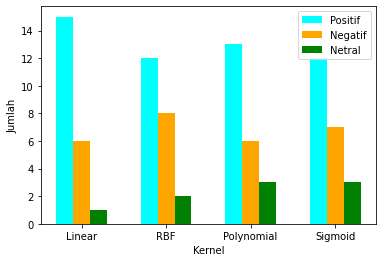

In [60]:
# importing package
import matplotlib.pyplot as plt
import numpy as np
  
# create data
x = np.arange(4)
y1 = [data_perkernel['linear']['positif'], data_perkernel['rbf']['positif'], data_perkernel['poly']['positif'], data_perkernel['sigmoid']['positif']]
y2 = [data_perkernel['linear']['negatif'], data_perkernel['rbf']['negatif'], data_perkernel['poly']['negatif'], data_perkernel['sigmoid']['negatif']]
y3 = [data_perkernel['linear']['netral'], data_perkernel['rbf']['netral'], data_perkernel['poly']['netral'], data_perkernel['sigmoid']['netral']]
width = 0.2
  
# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width, color='cyan')
plt.bar(x, y2, width, color='orange')
plt.bar(x+0.2, y3, width, color='green')


plt.xticks(x, ['Linear', 'RBF', 'Polynomial', 'Sigmoid'])

plt.xlabel("Kernel")
plt.ylabel("Jumlah")

plt.legend(["Positif", "Negatif", "Netral"])
plt.show()